# Import Library

In [1]:
# load data
import os

# computing
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# feature extraction
import cv2
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

# modelling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# evalutaion
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# load/save model
import pickle

### Define common pickle method

In [2]:
def load_file_pickle(filename):
    file_pickle = pickle.load(open(filename, 'rb'))
    return file_pickle

def save_file_pickle(data, filename):
    pickle.dump(data, open(filename, 'wb'))

#### Constant variable

In [3]:
BOW_FILE_PICKLE = "bow_dictionary.pkl"
SCALER_WS_FILE_PICKLE = "scaler_with_sift.pkl"
SCALER_WOS_FILE_PICKLE = "scaler_without_sift.pkl"
SVM_WS_FILE_PICKLE = "svm_with_sift_model.pkl"
SVM_WOS_FILE_PICKLE = "svm_without_sift_model.pkl"

In [4]:
def grayscaling(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return image

def resizing(image, size):
    image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
    return image

def equalizing(img):
    img = cv2.equalizeHist(img)
    return img

def prep_image(image):
    img = resizing(image, 192)
    img = grayscaling(img)
    # img = equalizing(img)
    return img

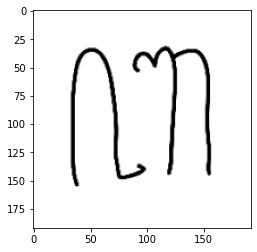

In [5]:
path = "../Dataset/augmented_test_src/#plan_2/ba57.mine3.png"
img_white = cv2.imread(path)
img_white = cv2.cvtColor(img_white, cv2.COLOR_BGR2RGB)
img_white = prep_image(img_white)

plt.imshow(img_white, cmap='gray')
plt.show()

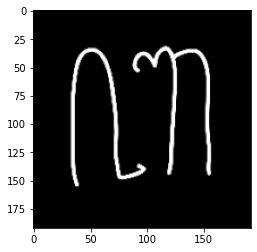

In [6]:
img_black = cv2.bitwise_not(img_white)

plt.imshow(img_black, cmap='gray')
plt.show()

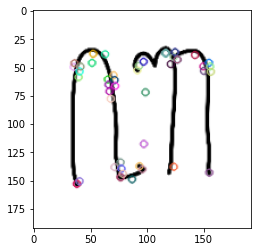

In [7]:
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img_white,None)

img_1 = cv2.drawKeypoints(img_white,keypoints_1,img_white)
plt.imshow(img_1)

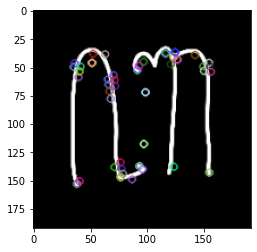

In [8]:
sift = cv2.SIFT_create()
keypoints_2, descriptors_2 = sift.detectAndCompute(img_black,None)

img_2 = cv2.drawKeypoints(img_black,keypoints_2,img_black)
plt.imshow(img_2)

In [9]:
descriptors_1[0]

array([ 22.,   3.,   0.,   2., 160.,  22.,   0.,   0., 160.,  31.,   0.,
         0.,  13.,   2.,   0.,   3.,  88.,  10.,   0.,   0.,   0.,   0.,
         0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  23.,
         1.,   0.,  10., 160.,   7.,   0.,   1., 160.,  11.,   0.,   1.,
        21.,   1.,   0.,  17., 132.,   6.,   0.,   0.,   0.,   0.,   0.,
         3.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  26.,   1.,
         0.,  17., 160.,   5.,   0.,   3., 160.,   5.,   0.,   1.,  19.,
         1.,   0.,  23., 130.,   3.,   0.,   0.,   0.,   0.,   0.,   5.,
         1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  28.,   0.,   0.,
        30., 160.,   0.,   0.,   4., 160.,   0.,   0.,   2.,   8.,   0.,
         0.,  35.,  86.,   0.,   0.,   0.,   0.,   0.,   0.,   8.,   1.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.], dtype=float32)

In [10]:
descriptors_2[0]

array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  86.,   0.,   0.,
         0.,   0.,   0.,   0.,   8., 160.,   0.,   0.,   2.,   8.,   0.,
         0.,  35.,  28.,   0.,   0.,  30., 160.,   0.,   0.,   4.,   1.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 130.,   3.,   0.,   0.,
         0.,   0.,   0.,   5., 160.,   5.,   0.,   1.,  19.,   1.,   0.,
        23.,  26.,   1.,   0.,  17., 160.,   5.,   0.,   3.,   1.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 132.,   6.,   0.,   0.,   0.,
         0.,   0.,   3., 160.,  11.,   0.,   1.,  21.,   1.,   0.,  17.,
        23.,   1.,   0.,  10., 160.,   7.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,  88.,  10.,   0.,   0.,   0.,   0.,
         0.,   1., 160.,  31.,   0.,   0.,  13.,   2.,   0.,   3.,  22.,
         3.,   0.,   2., 160.,  22.,   0.,   0.], dtype=float32)

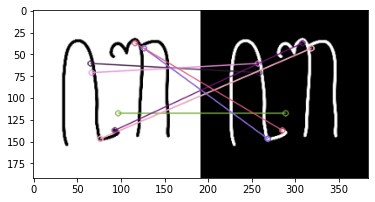

(<matplotlib.image.AxesImage at 0x1f6e1feeac8>, None)

In [11]:
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img_white, keypoints_1, img_black, keypoints_2, matches[:50], img_black, flags=2)
plt.imshow(img3),plt.show()

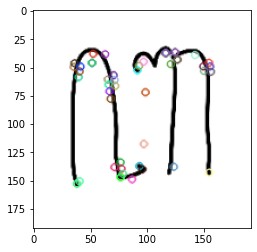

In [12]:
sift = cv2.SIFT_create()
img_black_inv = cv2.bitwise_not(img_black)
keypoints_3, descriptors_3 = sift.detectAndCompute(img_black_inv,None)

img_3 = cv2.drawKeypoints(img_black_inv,keypoints_3,img_black_inv)
plt.imshow(img_3)

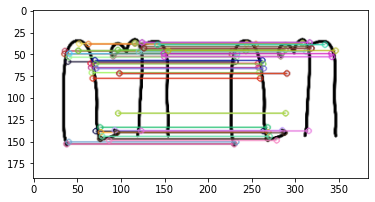

(<matplotlib.image.AxesImage at 0x1f6e0d9c748>, None)

In [13]:
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_3)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img_white, keypoints_1, img_black_inv, keypoints_3, matches[:50], img_black_inv, flags=2)
plt.imshow(img3),plt.show()

In [14]:
t = 0

for desc_1 in descriptors_1:
    for desc_2 in descriptors_2:
        if np.array_equal(desc_1, desc_2):
            t = t + 1
            break

print(t)

0


# Test Coloring & Overlay

In [15]:
def import_image(file) :
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = prep_image(image)
    return image

def import_data(path) :
    file_path = os.listdir(path)
    print(file_path)
    images = np.array([import_image(path + '/' + file) for file in file_path])
    
    return images

In [49]:
# folder_path = "../Dataset/coloring_test/color/Gray75"
# folder_path = "../Dataset/coloring_test/color/Gray50"
folder_path = "../Dataset/coloring_test/color/Gray25"

# folder_path = "../Dataset/coloring_test/overlay/TTD"
# folder_path = "../Dataset/coloring_test/overlay/CAP"
# folder_path = "../Dataset/coloring_test/overlay/CHAR"

In [50]:
hanacaraka = ('ba','ca','da','dha','ga','ha','ja','ka','la','ma','na','nga','nya','pa','ra','sa','ta','tha','wa','ya')

X = np.empty((0, 192, 192), np.uint8)
y = np.empty((0))

temp_X = import_data(folder_path)
temp_y = list(hanacaraka)

X = np.append(X, temp_X, axis=0)
y = np.append(y, temp_y, axis=0)

y

['ba_0.png', 'ca_0.png', 'da_0.png', 'dha_0.png', 'ga_0.png', 'ha_0.png', 'ja_0.png', 'ka_0.png', 'la_0.png', 'ma_0.png', 'na_0.png', 'nga_0.png', 'nya_0.png', 'pa_0.png', 'ra_0.png', 'sa_0.png', 'ta_0.png', 'tha_0.png', 'wa_0.png', 'ya_0.png']


array(['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na',
       'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya'],
      dtype='<U32')

In [51]:
X.shape

(20, 192, 192)

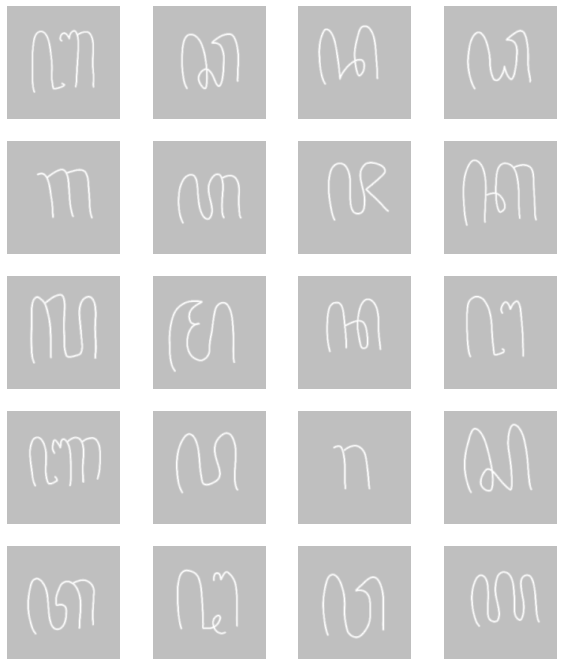

In [52]:
fig = plt.figure(figsize=(10, 12))
columns = 4
rows = 5
for i in range(1, columns*rows + 1):
    img_show = np.array(X[i-1, :])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_show, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

plt.show()

In [53]:
def extract_sift_features(list_image):
    image_descriptors = []
    sift = cv2.SIFT_create()
    for image in list_image:
        _, descriptor = sift.detectAndCompute(image, None)
        image_descriptors.append(descriptor)

    return image_descriptors

def create_feature_bow(image_descriptors, bow, num_cluster):
    X_features = []

    for i in range(len(image_descriptors)):
        features = np.array([0] * num_cluster, dtype=float)

        if image_descriptors[i] is not None:
            distance = cdist(image_descriptors[i], bow)
            argmin = np.argmin(distance, axis = 1)

            for j in argmin:
                features[j] += 1.0
        X_features.append(features)

    return np.array(X_features)

In [54]:
image_descriptors = extract_sift_features(X)
num_cluster = 750
bow = load_file_pickle(BOW_FILE_PICKLE)
X_feature = create_feature_bow(image_descriptors, bow, num_cluster)

In [55]:
X_feature.shape

(20, 750)

In [56]:
scaler = load_file_pickle(SCALER_WS_FILE_PICKLE)
X_scale = scaler.transform(X_feature)

svm_model = load_file_pickle(SVM_WS_FILE_PICKLE)
y_pred = svm_model.predict(X_scale)

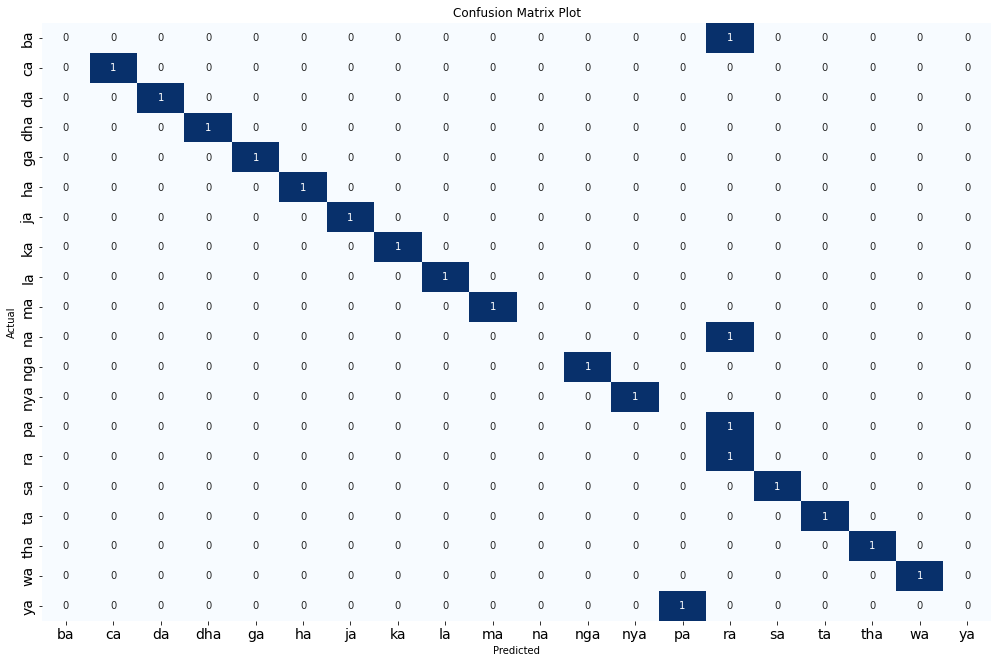

In [57]:
conf_ws = pd.DataFrame(confusion_matrix(y, y_pred), columns=hanacaraka, index=hanacaraka)

plt.figure(figsize=(17,11))

res = sns.heatmap(conf_ws, annot=True, fmt="g", cmap="Blues", cbar=False)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Plot")
plt.show()

In [48]:
class_rep_ws = classification_report(y, y_pred)

print("Classification report result:")
print(class_rep_ws)

Classification report result:
              precision    recall  f1-score   support

          ba       1.00      1.00      1.00         1
          ca       1.00      1.00      1.00         1
          da       1.00      1.00      1.00         1
         dha       1.00      1.00      1.00         1
          ga       1.00      1.00      1.00         1
          ha       1.00      1.00      1.00         1
          ja       1.00      1.00      1.00         1
          ka       1.00      1.00      1.00         1
          la       1.00      1.00      1.00         1
          ma       1.00      1.00      1.00         1
          na       1.00      1.00      1.00         1
         nga       1.00      1.00      1.00         1
         nya       1.00      1.00      1.00         1
          pa       1.00      1.00      1.00         1
          ra       1.00      1.00      1.00         1
          sa       1.00      1.00      1.00         1
          ta       1.00      1.00      1.00        

In [26]:
### Result Accuracy Score for SVM with SIFT
acc_ws = accuracy_score(y, y_pred)
print("Accuracy score:", acc_ws)

Accuracy score: 0.05


E:/GDrive/Skripsi/Repos/Dataset/coloring_test/color/Gray25/ba_0.png
Result Class Prediction : ['ba']


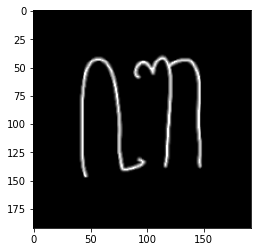

In [117]:
from ipywidgets import Button
from tkinter import Tk, filedialog
from IPython.display import clear_output, display

# Load file ==================================================================================
def import_image(file) :
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
# ============================================================================================
# Preprocessing Image ========================================================================
def equalizing(img):
    img = cv2.equalizeHist(img)
    return img

def grayscaling(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return image

def resizing(image, size):
    image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
    return image

def prep_image(image):
    img = resizing(image, 192)
    img = grayscaling(img)
    # img = equalizing(img)
    return img
# ============================================================================================
# Feature Extraction =========================================================================
def extract_sift_descriptor(image):
    sift = cv2.SIFT_create()
    _, descriptor = sift.detectAndCompute(image, None)
    return descriptor

def create_feature_bow(image_descriptor, bow, num_cluster):
    features = np.array([0] * num_cluster, dtype=float)

    if image_descriptor is not None:
        distance = cdist(image_descriptor, bow)
        argmin = np.argmin(distance, axis = 1)
        
        for j in argmin:
            features[j] += 1.0

    return np.array(features)

def extract_feature(image):
    img_descriptor = extract_sift_descriptor(image)
    
    num_cluster = 750
    bow = load_file_pickle(BOW_FILE_PICKLE)
    
    img_feature = create_feature_bow(img_descriptor, bow, num_cluster)
    return img_feature
# ============================================================================================
# Prediction Process =========================================================================
def predict_image(feature):
    scaler = load_file_pickle(SCALER_WS_FILE_PICKLE)
    feature_scale = scaler.transform([feature])
    
    svm_model = load_file_pickle(SVM_WS_FILE_PICKLE)
    result_predict = svm_model.predict(feature_scale)
    return result_predict
# ============================================================================================
# Open widget laod file ======================================================================
def select_files(b):
    clear_output()
    root = Tk()
    root.withdraw() 
    root.call('wm', 'attributes', '.', '-topmost', True)
    
    b.files = filedialog.askopenfilename(multiple=True) 
    print(b.files[0])
    processing_files(b.files[0])
# ============================================================================================
# Open widget laod file ======================================================================
def processing_files(file):
    img = import_image(file)
    plt.imshow(img)
    img = prep_image(img)
    plt.imshow(img, cmap='gray', vmax=255, vmin=0)
    
    img_feature = extract_feature(img)
    result_predict = predict_image(img_feature)
    print("Result Class Prediction :", result_predict)
# ============================================================================================

fileselect = Button(description="File select")
fileselect.on_click(select_files)

display(fileselect)